# Hopsitals
![umpc](https://www.trialnet.org/sites/default/files/styles/location_photo_802x450_/public/location_images/CHP_Exterior.jpg?itok=Wj8-Hk2g)

My task was to determine which neighborhood had the most hospitals. Hopefully an area with more hospitals would be able to provide more medical care which would defintely be beneficial in a post bombing scenario.

1. The first thing to do was import the csv file with the hospital data.

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('data-hospitallocations.csv')
df.head()

,Facility,Address,Y,X
0,UPMC Children's,"4401 Penn Avenue Pittsburgh, PA 15224",40.467315,-79.953590
1,UPMC Magee,"300 Halkett Street Pittsburgh, PA 15213",40.436889,-79.960700
2,UPMC McKeesport,"1500 5th Avenue McKeesport, PA 15132",40.351343,-79.849457
3,UPMC Mercy,"1400 Locust Street Pittsburgh, PA 15219",40.436137,-79.985285
4,UPMC Passavant,"9100 Babcock Boulevard Pittsburgh, PA 15237",40.573319,-80.014525


Looks like the data is all there, good!

2. The next step is to transform this data into a graphic that is easier to digest, like a scatterplot
- you do this by plotting based on the coordinates in the dataset

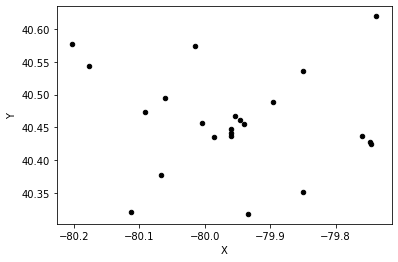

In [3]:
df.plot(x="X", y="Y", kind = "scatter", color = "black")

This however does not help too much because we don't have a map of Pittsburgh to compare the coordinates to. Let's fix this by creating a map visual of Pittsburgh. All we neep to do is import the dataset and use geopandas to plot the data.

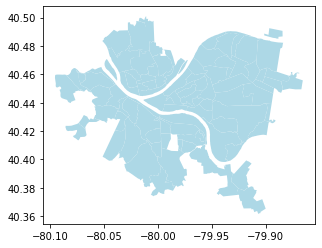

In [5]:
# import dataset
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot(color="lightblue") # plot the geopandas dataframe

- Now we need to make it easy to read plot points off of by changing the color to white, and making the edge color black.

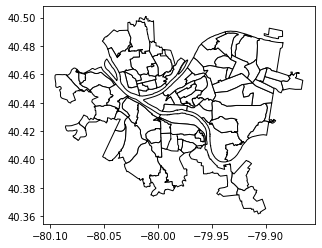

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
neighborhoods.plot(ax=ax, color="white", edgecolor='black')
plt.show()



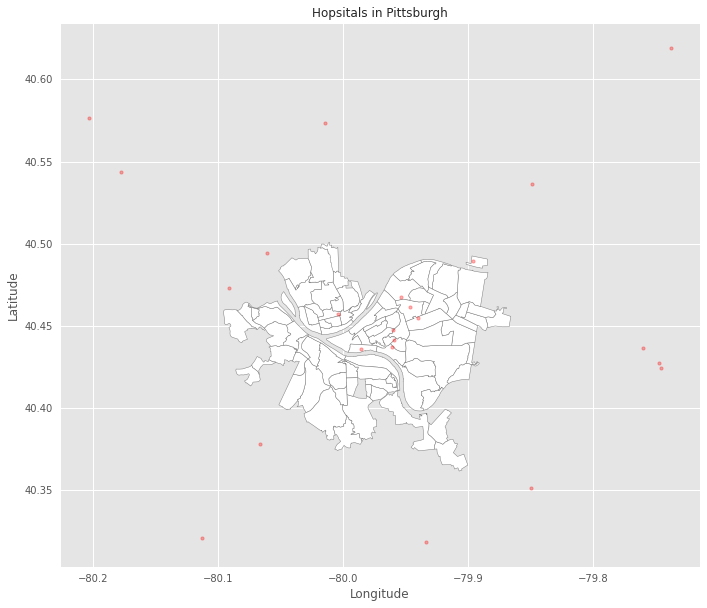

In [8]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(df.X, df.Y, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hopsitals in Pittsburgh");
    

The data looks a little bit off here, why are most of the plot points outside of the neighborhoods map? Well as it turns out, the dataset included hospitals in Allegheny county, so some of the datapoints were outside of our Pittsburgh neighborhood map. To fix this, we need to remove the points outside of the map to make it more visible.

The problem here though is that I only had the coordinates of the hospitals, not what neighborhood they were in. To figure this out, I had to use a neighborhood map that integrated google maps. This was actually a really cool and helpful site, as I could just copy and paste the coordinates of said hospital into the search bar and it would pop up on the map. If the hosptital was in a neighboorhood, I could click on the area and the name of the neighborhood would pop up. What a lifesaver!\
Website url: https://www.google.com/maps/d/u/0/viewermid=1isYpmgngpHDaHmjPjYM5_d4PVQ&gl=us&ptab=2&ie=UTF8&oe=UTF8&msa=0&ll=40.409585695793325%2C-79.89405408929062&z=12


If the hospital was in a Pittsburgh neighborhood, clicking on the area would reveal the neighborhood name:
![found](pittmapscreenshot.jpg)

The red dot indicates where this particular hospital was located. If the hospital was not in the neighborhood map, it was very easy to tell :) For example, this hospital in the lower right side of the image was not in the Pittsburgh neighborhood map.
![nonpitt](nonpitt.jpg)

Using the website, I was able to mark which neighborhoods hospitals were in as well as mark which ones weren't in Pittsburgh neighborhoods. I had to convert this data into a dataframe and also had to remove the irrelevant hospitals from the dataset. 

First I put the names of the Hospital and the neighborhood into a dictionary:

In [65]:


hospitals_df = pd.DataFrame({'Facility': ['UPMC Children\'s', 'UPMC Magee', 'UPMC McKeesport', 'UPMC Mercy', 'UPMC Passavant', 'UPMC Presbyterian',
                                        'UPMC Shadyside', 'UPMC St. Margaret\'s', 'UPMC East', 'Allegheny General Hospital', 'Allegheny Valley Hospital', 
                                        'Forbes Regional Hospital', 'West Penn Hospital', 'VA Pittsburgh Hospital', 'Heritage valley Hospital', 
                                        'Jefferson Regional Hospital', 'Ohio Valley Hospital', 'St Clair Hospital', 'Health South Rehab Sewickly', 'Southwood Psychatric Hospital',
                                        'Lifecare Hospital of Monroville', 'Health South Harmaville Rehabilitaiton', 'Lifecare Hospital of PGH Suburbana'], 
                            'Neighborhood': ['Central Lawrenceville', 'South Oakland', 'NOT PITT', 'Bluff', 'NOT PITT', 'West Oakland', 'Shadyside', 
                                            'Lincoln-Lemington-Belmar', 'NOT PITT', 'Central Northside', 'NOT PITT', 'NOT PITT', 'Bloomfield', 'North Oakland', 'NOT PITT', 
                                            'NOT PITT', 'NOT PITT', 'NOT PITT', 'NOT PITT', 'NOT PITT', 'NOT PITT', 'NOT PITT', 'NOT PITT']})
hospitals_df



,Facility,Neighborhood
0,UPMC Children's,Central Lawrenceville
1,UPMC Magee,South Oakland
2,UPMC McKeesport,NOT PITT
3,UPMC Mercy,Bluff
4,UPMC Passavant,NOT PITT
5,UPMC Presbyterian,West Oakland
6,UPMC Shadyside,Shadyside
7,UPMC St. Margaret's,Lincoln-Lemington-Belmar
8,UPMC East,NOT PITT
9,Allegheny General Hospital,Central Northside


##### Then you merge this data with the previous dataframe:

In [93]:
hospitals = pd.merge(df,hospitals_df)
hospitals

,Facility,Address,Y,X,Neighborhood
0,UPMC Magee,"300 Halkett Street Pittsburgh, PA 15213",40.436889,-79.960700,South Oakland
1,UPMC McKeesport,"1500 5th Avenue McKeesport, PA 15132",40.351343,-79.849457,NOT PITT
2,UPMC Mercy,"1400 Locust Street Pittsburgh, PA 15219",40.436137,-79.985285,Bluff
3,UPMC Passavant,"9100 Babcock Boulevard Pittsburgh, PA 15237",40.573319,-80.014525,NOT PITT
4,UPMC Presbyterian,"3601 Fifth Avenue Pittsburgh, PA 15213",40.441544,-79.959356,West Oakland
5,UPMC Shadyside,"5230 Center Ave Pittsburgh, PA 15232",40.454845,-79.939793,Shadyside
6,UPMC St. Margaret's,"815 Freeport Road Pittsburgh, PA 15215",40.489286,-79.895994,Lincoln-Lemington-Belmar
7,UPMC East,"2775 Mosside Boulevard Monroeville, PA 15146",40.436561,-79.760197,NOT PITT
8,Allegheny General Hospital,"AGH 320 E. North Ave, PGH 15212",40.457010,-80.003724,Central Northside
9,Allegheny Valley Hospital,"Allegheny Valley 1301 Carlisle Street, Natrona...",40.619129,-79.737849,NOT PITT


##### Now all the data is in one place! From here we can get rid of the non Pittsburgh locations:

In [94]:
hospitals = hospitals.drop([1, 3, 7, 9, 10, 13, 14, 15, 16, 17, 18])
hospitals.head()

,Facility,Address,Y,X,Neighborhood
0,UPMC Magee,"300 Halkett Street Pittsburgh, PA 15213",40.436889,-79.960700,South Oakland
2,UPMC Mercy,"1400 Locust Street Pittsburgh, PA 15219",40.436137,-79.985285,Bluff
4,UPMC Presbyterian,"3601 Fifth Avenue Pittsburgh, PA 15213",40.441544,-79.959356,West Oakland
5,UPMC Shadyside,"5230 Center Ave Pittsburgh, PA 15232",40.454845,-79.939793,Shadyside
6,UPMC St. Margaret's,"815 Freeport Road Pittsburgh, PA 15215",40.489286,-79.895994,Lincoln-Lemington-Belmar


##### Now we have our new and improved dataset. Time to try again with plotting the data.

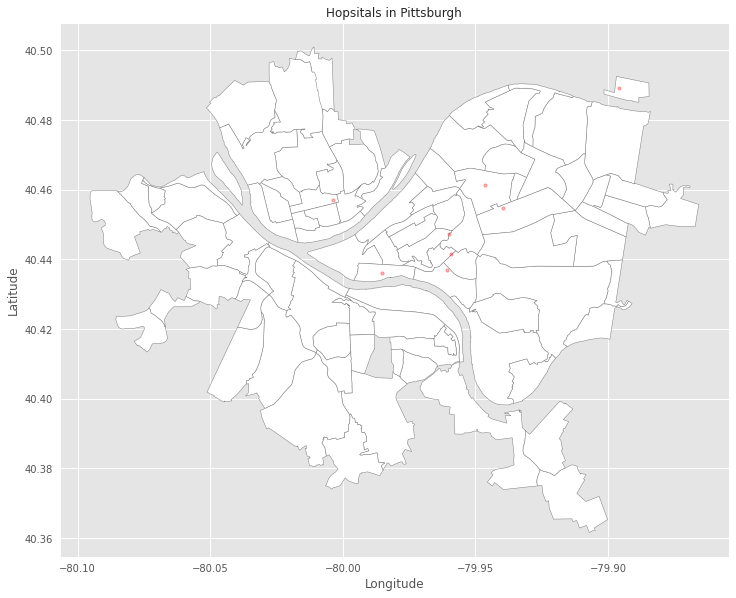

In [95]:
with plt.style.context(("seaborn", "ggplot")):
    neighborhoods.plot(figsize=(12,10),
               color="white",
               edgecolor = "grey");
plt.scatter(hospitals.X, hospitals.Y, s=10, color="red", alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hopsitals in Pittsburgh");

#### That looks much better!
As we can see from this new and imroved map, each hospital is in a distinct neighborhood. But from our data we can tell that 3 locations are in an Oakland neighborhood: South, West, and North. Therefore, it seems Oakland is the best place to be for quick access to medical care.